In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Klassen import Welle
from numpy.random import randint

# Allgemeine Berechnung für die Biegelinie

Vereinfachungen und Randbedingungen:
- z beginnt immer im Festlager und geht bis zum Loslager
- Welleninformationen können über Klasse Welle abgerufen werden (Durchmesser, Kräfte, etc)
- Alle Längen in $mm$

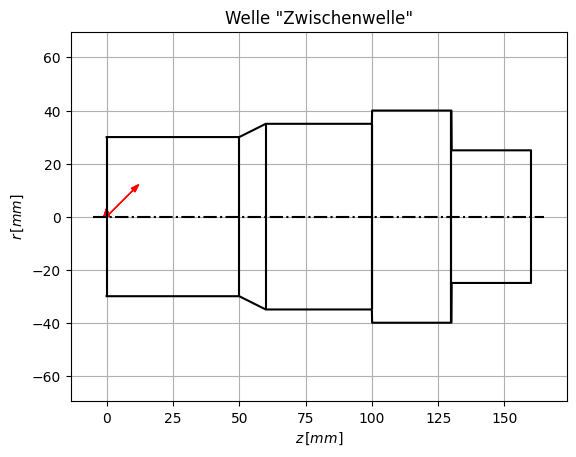

In [3]:
Zwischenwelle = Welle("Zwischenwelle")
zw_geometrie = [
    [0,30],
    [50,30],
    [60,35],
    [100,35],
    [100,40],
    [130,40],
    [130,25],
    [160,25],
]

Zwischenwelle.set_geometrie(zw_geometrie)
Zwischenwelle.plot()

In [8]:
testkräfte= [(1.5, 0, 0, 0, -1.5, 0, 0),(1, 0, 0, 0, -1.5, 0, 0)]

In [9]:
max((testkräfte[i][0] for i in range(len(testkräfte))))

1.5